## Track 2 TODO 1:  Retrieve predicted segmentation mask and estimated joints from pretrained network
 
For the first part of our animation pipeline, we will use the pretrained objection detection model and segmentation method from author's implementation to obtain a segmentation mask for our own drawing. Your first task is:
1. Go to the Github repository https://github.com/facebookresearch/AnimatedDrawings/tree/main, follow the instructions in "animating-your-own-drawing" https://github.com/facebookresearch/AnimatedDrawings/tree/main#animating-your-own-drawing) to obtain a segmentation mask "mask.png", a texture map "texture.png", and locations of detected joint skeleton in "char_cfg.yaml" using the example drawing "garlic.png"
2. Write code to load the segmentation mask and the original image, compose and visualize a masked image using Matplotlib
3. Load detected joint locations, use Matplotlib to visualize the locations and labels of the joints. Visualize the tree hierarchy of the skeleton using lines (See desired output in session slide)
4. Make your own drawing, and repeat step 1-3 

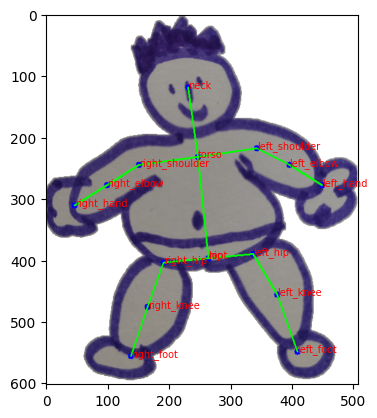

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load the mask

img = cv2.imread('char1/mask.png')
background = np.bitwise_not(img)
ori_img = cv2.imread('char1/texture.png')
# compute AND to img and ori_img
img = np.bitwise_and(img, ori_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.add(img, background)
plt.imshow(img)

# read the yaml file

import yaml
with open('char1/char_cfg.yaml') as f:
    data = yaml.load(f, Loader=yaml.FullLoader)

# draw the joint
for joint in data['skeleton']:
    cv2.circle(img, tuple(joint['loc']), 5, (0, 0, 255), -1)
    plt.text(joint['loc'][0],joint['loc'][1],joint['name'],color='red',fontsize=7)
plt.imshow(img)

# draw the bone
for node in data['skeleton']:
    if node['parent'] is not None:
        for name in data['skeleton']:
            if name['name'] == node['parent']:
                cv2.line(img, tuple(node['loc']), tuple(name['loc']), (0, 255, 0), 2)
plt.imshow(img)

## Track 2 TODO 2:  2D Mesh Generation using delaunay triangulation
For the second part of our animation pipeline, we need to generate a 2D mesh from our masked image that we can use for rigging during the animation phase. Your task is
1. Generate random points using Poisson Disk Sampling (https://medium.com/@hemalatha.psna/implementation-of-poisson-disc-sampling-in-javascript-17665e406ce1) as points in our mesh
2. Use Delaunay triangulation to generate a 2D triangle mesh from sampled points
3. Visualize the generated 2D mesh using Matplotlib


9999
9998
9997
9996
9995
9994
9993
9992
9991
9990
9989
9988
9987
9986
9985
9984
9983
9982
9981
9980
9979
9978
9977
9976
9975
9974
9973
9972
9971
9970
9969
9968
9967
9966
9965
9964
9963
9962
9961
9960
9959
9958
9957
9956
9955
9954
9953
9952
9951
9950
9949
9948
9947
9946
9945
9944
9943
9942
9941
9940
9939
9938
9937
9936
9935
9934
9933
9932
9931
9930
9929
9928
9927
9926
9925
9924
9923
9922
9921
9920
9919
9918
9917
9916
9915
9914
9913
9912
9911
9910
9909
9908
9907
9906
9905
9904
9903
9902
9901
9900
9899
9898
9897
9896
9895
9894
9893
9892
9891
9890
9889
9888
9887
9886
9885
9884
9883
9882
9881
9880
9879
9878
9877
9876
9875
9874
9873
9872
9871
9870
9869
9868
9867
9866
9865
9864
9863
9862
9861
9860
9859
9858
9857
9856
9855
9854
9853
9852
9851
9850
9849
9848
9847
9846
9845
9844
9843
9842
9841
9840
9839
9838
9837
9836
9835
9834
9833
9832
9831
9830
9829
9828
9827
9826
9825
9824
9823
9822
9821
9820
9819
9818
9817
9816
9815
9814
9813
9812
9811
9810
9809
9808
9807
9806
9805
9804
9803
9802
9801
9800


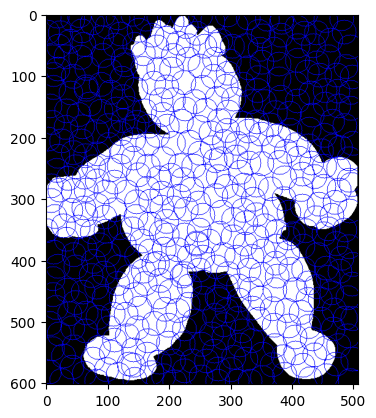

In [60]:
# load the mask

import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('char1/mask.png')
plt.imshow(img)

# Poisson Disk Sampling in the mask

# generate random points
import random
import math

def count_distance(p0,p1):
    return math.sqrt((p0[0]-p1[0])**2+(p0[1]-p1[1])**2)

def poissonDiskSampling(r):
    # generate tons of random points in interval [0,500][0,600]
    points = []
    for i in range(10000):
        points.append([random.random()*500,random.random()*600])
    for i in range(len(points)):
        for j in range(i+1,len(points)):
            if j >= len(points):
                break
            if count_distance(points[i],points[j]) < r:
                points.remove(points[j])
                j = j-1
                print(len(points))
    for point in points:
        cv2.circle(img, (int(point[0]),int(point[1])), 20, (0, 0, 255),0)
        plt.imshow(img)



poissonDiskSampling(20)

